# ***Домашняя работа №6***
## Терешин Кирилл Александрович 
### бфбо-03-24

## ***2.3.1. Загрузка данных и первичный анализ***

1. Импортировать библиотеки: pandas, numpy, scikit-learn (модели, CV, метрики), matplotlib (для графиков).

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Разделение данных и кросс-валидация
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# Модели
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
# Метрики
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

2. Загрузить выбранный CSV в pandas.DataFrame.



In [8]:
data = pd.read_csv('S06-hw-dataset-01.csv', sep=",")

3. Зафиксировать минимум:

>- head(), info(), базовые статистики (describe() или аналог);
>- распределение таргета target (доли классов);
>- (желательно) проверку пропусков и типы столбцов.


In [6]:
data.head()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-null  float64
 18  num18 

In [7]:
data.describe()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000


In [11]:
data['target'].value_counts(normalize=True) # распределение классов в целевой переменной

target
0    0.676583
1    0.323417
Name: proportion, dtype: float64

In [12]:
data.isnull().sum() # проверка на пропуски

id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64

In [13]:
data.dtypes # проверка типов данных

id                 int64
num01            float64
num02            float64
num03            float64
num04            float64
num05            float64
num06            float64
num07            float64
num08            float64
num09            float64
num10            float64
num11            float64
num12            float64
num13            float64
num14            float64
num15            float64
num16            float64
num17            float64
num18            float64
num19            float64
num20            float64
num21            float64
num22            float64
num23            float64
num24            float64
cat_contract       int64
cat_region         int64
cat_payment        int64
tenure_months      int64
target             int64
dtype: object

4. Определить:

>- X – признаки (все столбцы, кроме target; столбец id не использовать как признак);
>- y – таргет (target).


In [14]:
x = data.drop(['target', 'id'], axis=1)
y = data['target']

## ***2.3.2. Train/Test-сплит и воспроизводимость***

1. Разделить данные на train/test:

>- test_size разумный (например, 0.2 или 0.25);
>- обязательно фиксировать random_state (например, 42);
>- для классификации – использовать stratify=y.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42, stratify=y)
print("Размер обучающей выборки:", x_train.shape)
print(f"Размер тестовой выборки: {x_test.shape}")

Размер обучающей выборки: (9000, 28)
Размер тестовой выборки: (3000, 28)


2. Коротко пояснить, почему фиксированный seed и стратификация важны

Если не фиксировать random state, то качество модели будет прыгать при каждом новом запуске, а стратификация важна чтоб равномерно распределить доли классов в train/test

## ***2.3.3. Baseline’ы***

1. Сделать минимум два baseline’а:

>- DummyClassifier (например, most_frequent или stratified).
>- LogisticRegression (желательно через Pipeline(StandardScaler + LogisticRegression)).

Для обоих baseline’ов посчитать метрики на test (см. ниже) и кратко интерпретировать.


In [28]:
dum_cls = DummyClassifier(strategy="most_frequent", random_state=42)
dum_cls.fit(x_train,y_train)

# Предсказания для бейзлайна
y_pred_dummy = dum_cls.predict(x_test)
y_pred_proba_dummy = dum_cls.predict_proba(x_test)[:, 1]

#  оценка качества dummy модели
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_roc_auc = roc_auc_score(y_test, y_pred_proba_dummy)

print(f"Dummy Accuracy: {dummy_accuracy:.4f}")
print(f" ROC-AUC: {dummy_roc_auc:.4f}")
print(f" Стратегия: '{dum_cls.strategy}' (всегда предсказывает самый частый класс)")

Dummy Accuracy: 0.6767
 ROC-AUC: 0.5000
 Стратегия: 'most_frequent' (всегда предсказывает самый частый класс)


In [27]:
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

logreg_pipe.fit(x_train, y_train)

# Предсказания
y_pred_lr = logreg_pipe.predict(x_test)
y_pred_proba_lr = logreg_pipe.predict_proba(x_test)[:, 1]

# Метрики
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

print(f"LogReg Accuracy: {lr_accuracy:.4f}")
print(f"LogReg ROC-AUC: {lr_roc_auc:.4f}")

LogReg Accuracy: 0.8297
LogReg ROC-AUC: 0.8789


In [30]:
print(f"Dummy Accuracy: {dummy_accuracy:.4f}")
print(f"Dummy ROC-AUC: {dummy_roc_auc:.4f}")

print(f"LogReg Accuracy: {lr_accuracy:.4f}")
print(f"LogReg ROC-AUC: {lr_roc_auc:.4f}")

Dummy Accuracy: 0.6767
Dummy ROC-AUC: 0.5000
LogReg Accuracy: 0.8297
LogReg ROC-AUC: 0.8789


LogisticRegression показывает более высокие метрики, чем DummyClassifier, что означает:
1. признаки действительно информативны;
2. модель способна различать классы;
3. дальнейшие модели (деревья, ансамбли) должны сравниваться именно с LogisticRegression, а не с Dummy.


## ***2.3.4. Модели недели 6 (обязательно)***

Реализовать и сравнить минимум 3 модели недели 6 (рекомендуется 4):


In [34]:
# Решение с помощью Decision Tree
tree = DecisionTreeClassifier(
    max_depth=None,
    random_state=42
)
tree.fit(x_train, y_train)

y_pred_tree = tree.predict(x_test)
y_proba_tree = tree.predict_proba(x_test)[:, 1]

tree_acc = accuracy_score(y_test, y_pred_tree)
tree_auc = roc_auc_score(y_test, y_proba_tree)

print(f"Decision Tree — Accuracy: {tree_acc:.4f}, ROC-AUC: {tree_auc:.4f}")

Decision Tree — Accuracy: 0.8567, ROC-AUC: 0.8343


In [36]:
# Решение с помощью Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
y_proba_rf = rf.predict_proba(x_test)[:, 1]

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_proba_rf)

print(f"Random Forest — Accuracy: {rf_acc:.4f}, ROC-AUC: {rf_auc:.4f}")

Random Forest — Accuracy: 0.9330, ROC-AUC: 0.9703


In [38]:
# Решение с помощью Bagging
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=200,
    random_state=42
)
bag.fit(x_train, y_train)

y_pred_bag = bag.predict(x_test)
y_proba_bag = bag.predict_proba(x_test)[:, 1]

bag_acc = accuracy_score(y_test, y_pred_bag)
bag_auc = roc_auc_score(y_test, y_proba_bag)

print(f"Bagging — Accuracy: {bag_acc:.4f}, ROC-AUC: {bag_auc:.4f}")

Bagging — Accuracy: 0.9217, ROC-AUC: 0.9627


In [40]:
# Решение с помощью Gradient Boosting
gb = GradientBoostingClassifier(
    random_state=42
)
gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)
y_proba_gb = gb.predict_proba(x_test)[:, 1]

gb_acc = accuracy_score(y_test, y_pred_gb)
gb_auc = roc_auc_score(y_test, y_proba_gb)

print(f"Gradient Boosting — Accuracy: {gb_acc:.4f}, ROC-AUC: {gb_auc:.4f}")

Gradient Boosting — Accuracy: 0.9063, ROC-AUC: 0.9582


In [50]:
import pandas as pd

results = pd.DataFrame({
    'Модель': ['Decision Tree', 'Bagging', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [tree_acc, bag_acc, rf_acc, gb_acc],
    'ROC-AUC': [tree_auc, bag_auc, rf_auc, gb_auc]
})

results

,Модель,Accuracy,ROC-AUC
0,Decision Tree,0.856667,0.834335
1,Bagging,0.921667,0.962678
2,Random Forest,0.933000,0.970335
3,Gradient Boosting,0.906333,0.958239


DecisionTreeClassifier
- Обязательно показать контроль сложности (например, max_depth + min_samples_leaf; или ccp_alpha).

RandomForestClassifier
- Желательно посмотреть хотя бы одну из "лесных" ручек (max_features, min_samples_leaf, max_depth).

Один boosting на выбор:

- AdaBoostClassifier или
- GradientBoostingClassifier или
- HistGradientBoostingClassifier


Подбор гиперпараметров:

- выполнять только на train через CV (GridSearchCV или аккуратный перебор);
- test использовать один раз для финальной оценки.


In [45]:
C_values = [0.01, 0.1, 1.0, 10.0]

for C in C_values:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(C=C, max_iter=1000))
    ])
    
    score = cross_val_score(pipe, x_train, y_train, cv=5).mean()
    print(f"C={C}: accuracy={score:.4f}")

    # обучаем модель с лучшим C
best_model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(C=0.01, max_iter=1000))
])

best_model.fit(x_train, y_train)

# предсказания
y_pred = best_model.predict(x_test)
y_proba = best_model.predict_proba(x_test)[:, 1]   # для ROC-AUC

# метрики
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print("Accuracy:", acc)
print("ROC-AUC:", roc)



C=0.01: accuracy=0.8319
C=0.1: accuracy=0.8346
C=1.0: accuracy=0.8348
C=10.0: accuracy=0.8347
Accuracy: 0.8293333333333334
ROC-AUC: 0.8790899395662994


## ***2.3.5. Метрики качества (обязательно)***

Минимальный набор:

 accuracy – всегда
 f1:
 - для бинарной классификации: обычный f1
 - для мультикласса (S06-hw-dataset-03.csv): f1_macro (или явно пояснить выбранный вариант)

In [52]:
from sklearn.metrics import f1_score

# добавим функцию поиска f1
def get_f1(model, x_test, y_test):
    y_pred = model.predict(x_test)
    return f1_score(y_test, y_pred)


# для каждой модели найдем f1
tree_f1 = get_f1(tree, x_test, y_test)
bag_f1 = get_f1(bag, x_test, y_test)
rf_f1 = get_f1(rf, x_test, y_test)
gb_f1 = get_f1(gb, x_test, y_test)


# сделаем обновленную таблицу
results = pd.DataFrame({
    'Модель': ['Decision Tree', 'Bagging', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [tree_acc, bag_acc, rf_acc, gb_acc],
    'F1': [tree_f1, bag_f1, rf_f1, gb_f1],
    'ROC-AUC': [tree_auc, bag_auc, rf_auc, gb_auc]
})

results

,Модель,Accuracy,F1,ROC-AUC
0,Decision Tree,0.856667,0.776739,0.834335
1,Bagging,0.921667,0.873859,0.962678
2,Random Forest,0.933000,0.891644,0.970335
3,Gradient Boosting,0.906333,0.844666,0.958239


ROC-AUC:
 - обязательно для бинарных датасетов (если модель даёт вероятности)
 - для мультикласса можно:
 - - либо не считать ROC-AUC (и явно написать почему),
 - - либо посчитать multi-class AUC (например, OVR) и объяснить.

In [53]:
results


,Модель,Accuracy,F1,ROC-AUC
0,Decision Tree,0.856667,0.776739,0.834335
1,Bagging,0.921667,0.873859,0.962678
2,Random Forest,0.933000,0.891644,0.970335
3,Gradient Boosting,0.906333,0.844666,0.958239


Рекомендуемые диагностические графики:

- ROC-кривая (для бинарных задач);
- confusion matrix;
- (по желанию для дисбаланса, особенно dataset-04) PR-кривая.


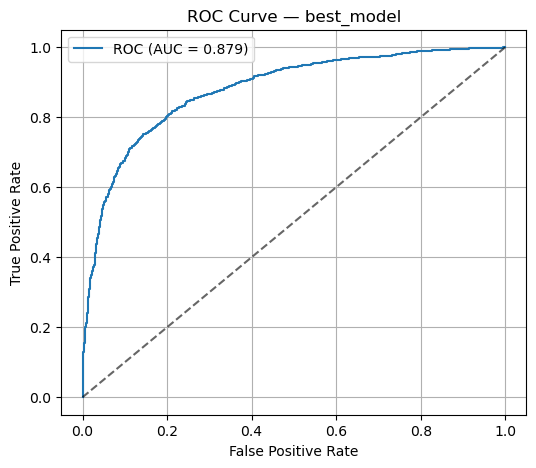

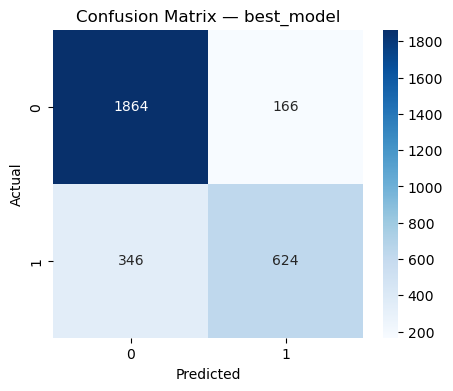

In [ ]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix

# Выбираем лучшую модель среди ансамблей деревьев по ROC-AUC (tree, bag, rf, gb)
ensemble_aucs = {'tree': tree_auc, 'bag': bag_auc, 'rf': rf_auc, 'gb': gb_auc}
best_ens_name = max(ensemble_aucs, key=ensemble_aucs.get)
best_ensemble_model = {'tree': tree, 'bag': bag, 'rf': rf, 'gb': gb}[best_ens_name]
print(f'Best ensemble model: {best_ens_name} with AUC={ensemble_aucs[best_ens_name]:.3f}')

# Предсказания и вероятности от лучшей модели-ансамбля
y_pred_ens = best_ensemble_model.predict(x_test)
# некоторые модели могут не поддерживать predict_proba для всех ситуаций, поэтому делаем безопасный вызов
if hasattr(best_ensemble_model, 'predict_proba'):
    y_proba_ens = best_ensemble_model.predict_proba(x_test)[:, 1]
else:
    # если нет predict_proba, используем decision_function и нормируем (редко для деревьев)
    y_scores = best_ensemble_model.decision_function(x_test)
    # простая линейная нормализация для построения ROC/PR
    y_proba_ens = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())

# ROC-кривая для лучшей модели-ансамбля
fpr, tpr, _ = roc_curve(y_test, y_proba_ens)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve — {best_ens_name}')
plt.legend()
plt.grid(True)
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_ens)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix — {best_ens_name}')
plt.show()

# Precision-Recall кривая
precision, recall, _ = precision_recall_curve(y_test, y_proba_ens)
avg_prec = average_precision_score(y_test, y_proba_ens)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'AP = {avg_prec:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve — {best_ens_name}')
plt.legend()
plt.grid(True)
plt.show()

## ***2.3.6. Интерпретация (обязательно)***

Для лучшей модели (по согласованному критерию – например, ROC-AUC на бинарных задачах или f1_macro на мультиклассе):

- посчитать permutation importance (top-10/15 признаков);
- кратко интерпретировать: какие признаки влияют сильнее и насколько это похоже на ожидания по данным.
